In [1]:
import datetime as dt
import numpy as np
import pandas as pd

import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
from functions import train_val_split

In [3]:
merged_train_all = pd.read_pickle('./train.pkl')
merged_test_all = pd.read_pickle('./val.pkl')

In [4]:
merged_train_all = merged_train_all.set_index(pd.DatetimeIndex(merged_train_all['Date']))
merged_test_all =  merged_test_all.set_index(pd.DatetimeIndex(merged_test_all['Date']))

In [5]:
merged_train_all = merged_train_all.drop(columns=['Date'])
merged_test_all =  merged_test_all.drop(columns=['Date'])

In [6]:
mask_0_sales_train = merged_train_all.loc[:, 'Sales'] != 0
mask_0_sales_test = merged_test_all.loc[:, 'Sales'] != 0
merged_train_all = merged_train_all.loc[mask_0_sales_train, :]
merged_test_all = merged_test_all.loc[mask_0_sales_test, :]

In [7]:
merged_train_all.head()

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,state_holiday,winter,spring,...,Assortment_c,competition_active,Promo2_active,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,259.0,6851.0,1444.0,1.0,0.0,1.0,210.0,1.0,1.0,0.0,...,0,1.0,0.0,1,1,1,2013,1,1,1
2013-01-01,262.0,17267.0,2875.0,1.0,0.0,1.0,1180.0,1.0,1.0,0.0,...,0,0.0,0.0,1,1,1,2013,1,1,1
2013-01-01,274.0,3102.0,729.0,1.0,0.0,1.0,3640.0,1.0,1.0,0.0,...,0,1.0,0.0,1,1,1,2013,1,1,1
2013-01-01,335.0,2401.0,482.0,1.0,0.0,1.0,90.0,1.0,1.0,0.0,...,0,1.0,0.0,1,1,1,2013,1,1,1
2013-01-01,353.0,3139.0,820.0,1.0,0.0,1.0,900.0,1.0,1.0,0.0,...,0,1.0,0.0,1,1,1,2013,1,1,1


In [8]:
merged_train_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313874 entries, 2013-01-01 to 2014-01-31
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                313874 non-null  float64
 1   Sales                313874 non-null  float64
 2   Customers            313874 non-null  float64
 3   Open                 313874 non-null  float64
 4   Promo                313874 non-null  float64
 5   SchoolHoliday        313874 non-null  float64
 6   CompetitionDistance  313874 non-null  float64
 7   state_holiday        313874 non-null  float64
 8   winter               313874 non-null  float64
 9   spring               313874 non-null  float64
 10  summer               313874 non-null  float64
 11  fall                 313874 non-null  float64
 12  StoreType_a          313874 non-null  uint8  
 13  StoreType_b          313874 non-null  uint8  
 14  StoreType_c          313874 non-null  uint8  
 15  S

In [9]:
merged_train_all.describe(include='all')

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,state_holiday,winter,spring,...,Assortment_c,competition_active,Promo2_active,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,313874.000000,313874.000000,313874.000000,313874.0,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,...,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000
mean,558.035986,6797.831477,755.939017,1.0,0.430083,0.197799,5430.271096,0.001032,0.303475,0.223399,...,0.460363,0.868976,0.135507,2.527473,2.394330,6.091244,2013.078254,170.005789,15.879563,24.615084
std,321.876475,3092.594958,400.713349,0.0,0.495088,0.398340,7741.015908,0.032112,0.459759,0.416524,...,0.498427,0.337427,0.342264,1.724081,1.144856,3.617705,0.268572,110.276332,8.678929,15.699507
min,1.000000,133.000000,18.000000,1.0,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,1.000000
25%,279.000000,4719.000000,510.000000,1.0,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2013.000000,67.000000,8.000000,10.000000
50%,557.000000,6204.000000,668.000000,1.0,0.000000,0.000000,2320.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,3.000000,2.000000,6.000000,2013.000000,170.000000,16.000000,25.000000
75%,836.000000,8165.000000,887.000000,1.0,1.000000,0.000000,6890.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,9.000000,2013.000000,266.000000,23.000000,38.000000
max,1115.000000,37646.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.000000,4.000000,12.000000,2014.000000,365.000000,31.000000,52.000000


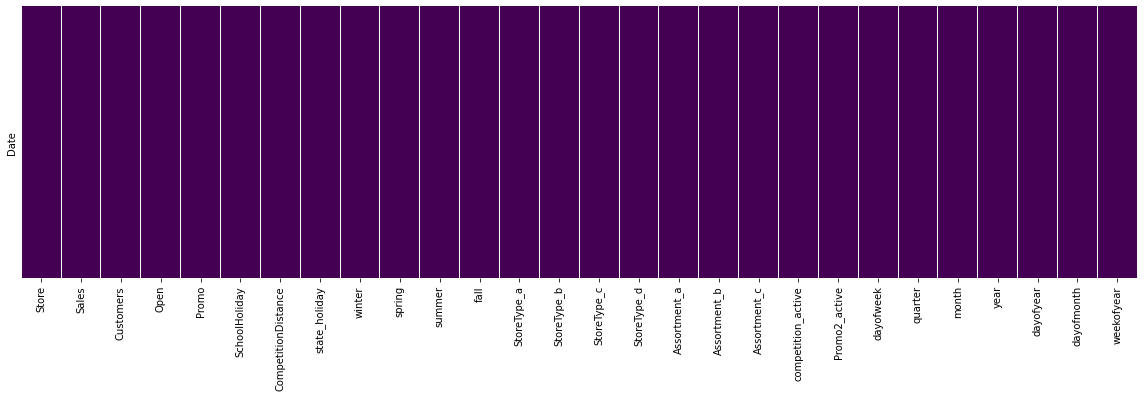

In [10]:
plt.figure(figsize=(20,5))
sns.heatmap(merged_train_all.isnull(),yticklabels=False,cbar=False,cmap='viridis')

For the sake of being able to create the models, rows with n/a values are dropped.Not whole columns, so that the total number of features is kept.

In [11]:
merged_train_clean = merged_train_all.dropna(axis=0)
merged_test_clean = merged_test_all.dropna(axis=0)

In [12]:
merged_train_clean.describe(include='all')

,Store,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,state_holiday,winter,spring,...,Assortment_c,competition_active,Promo2_active,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
count,313874.000000,313874.000000,313874.000000,313874.0,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,...,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000,313874.000000
mean,558.035986,6797.831477,755.939017,1.0,0.430083,0.197799,5430.271096,0.001032,0.303475,0.223399,...,0.460363,0.868976,0.135507,2.527473,2.394330,6.091244,2013.078254,170.005789,15.879563,24.615084
std,321.876475,3092.594958,400.713349,0.0,0.495088,0.398340,7741.015908,0.032112,0.459759,0.416524,...,0.498427,0.337427,0.342264,1.724081,1.144856,3.617705,0.268572,110.276332,8.678929,15.699507
min,1.000000,133.000000,18.000000,1.0,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2013.000000,1.000000,1.000000,1.000000
25%,279.000000,4719.000000,510.000000,1.0,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,3.000000,2013.000000,67.000000,8.000000,10.000000
50%,557.000000,6204.000000,668.000000,1.0,0.000000,0.000000,2320.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,3.000000,2.000000,6.000000,2013.000000,170.000000,16.000000,25.000000
75%,836.000000,8165.000000,887.000000,1.0,1.000000,0.000000,6890.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,4.000000,3.000000,9.000000,2013.000000,266.000000,23.000000,38.000000
max,1115.000000,37646.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,6.000000,4.000000,12.000000,2014.000000,365.000000,31.000000,52.000000


In [13]:
#merged_train_clean.loc[:, 'Date'] = merged_train_clean.loc[:, 'Date'].map(dt.datetime.toordinal)
#merged_test_clean.loc[:, 'Date'] = merged_test_clean.loc[:, 'Date'].map(dt.datetime.toordinal)

In [14]:
merged_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313874 entries, 2013-01-01 to 2014-01-31
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                313874 non-null  float64
 1   Sales                313874 non-null  float64
 2   Customers            313874 non-null  float64
 3   Open                 313874 non-null  float64
 4   Promo                313874 non-null  float64
 5   SchoolHoliday        313874 non-null  float64
 6   CompetitionDistance  313874 non-null  float64
 7   state_holiday        313874 non-null  float64
 8   winter               313874 non-null  float64
 9   spring               313874 non-null  float64
 10  summer               313874 non-null  float64
 11  fall                 313874 non-null  float64
 12  StoreType_a          313874 non-null  uint8  
 13  StoreType_b          313874 non-null  uint8  
 14  StoreType_c          313874 non-null  uint8  
 15  S

For testing purposes dropping all columns that are not numerical

In [15]:
merged_train_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 313874 entries, 2013-01-01 to 2014-01-31
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store                313874 non-null  float64
 1   Sales                313874 non-null  float64
 2   Customers            313874 non-null  float64
 3   Open                 313874 non-null  float64
 4   Promo                313874 non-null  float64
 5   SchoolHoliday        313874 non-null  float64
 6   CompetitionDistance  313874 non-null  float64
 7   state_holiday        313874 non-null  float64
 8   winter               313874 non-null  float64
 9   spring               313874 non-null  float64
 10  summer               313874 non-null  float64
 11  fall                 313874 non-null  float64
 12  StoreType_a          313874 non-null  uint8  
 13  StoreType_b          313874 non-null  uint8  
 14  StoreType_c          313874 non-null  uint8  
 15  S

# RMSPE

In [16]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

# Baseline Model

In [17]:
merge_df = pd.concat([merged_train_clean, merged_test_clean])

In [18]:
lazy_estimator_predictions = pd.DataFrame(merge_df.loc[:, ['Store','Sales']].copy()) 
    
lazy_estimator_predictions['sales_predicted'] = lazy_estimator_predictions.loc[:, ['Store','Sales']].groupby('Store').transform('mean')

print('The RMSPE for the baseline model is {:.2f}'.format(metric(np.array(lazy_estimator_predictions.loc[:, 'sales_predicted']), 
                                                             np.array(lazy_estimator_predictions.loc[:, 'Sales']))))

The RMSPE for the baseline model is 36.40


# Random Forest

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
X_train = merged_train_clean.drop(columns=['Sales'])
y_train = merged_train_clean.loc[:, 'Sales'].to_frame()
X_test = merged_test_clean.drop(columns=['Sales'])
y_test = merged_test_clean.loc[:, 'Sales'].to_frame()
    
    
rf_grid = RandomForestRegressor(random_state = 42, criterion='mse')
grid_search = GridSearchCV(rf_grid, 
                           param_grid = {
                                     "bootstrap": [False],
                                       "n_estimators": [500, 1000],
                                       "max_features": ['auto','log2','sqrt'],
                                       "max_depth": [4,5,6]
                                       },
                           n_jobs = -1,
                           cv = 3,
                           return_train_score = False)
grid_search.fit(X_train, np.ravel(y_train))

best_grid = grid_search.best_estimator_

print('Best model parameters {}'.format(grid_search.best_params_))

Best model parameters {'bootstrap': False, 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 1000}


In [21]:
forecast_all_rf = merged_test_clean.loc[:, ['Store', 'Sales']]
forecast_all_rf['sales_predicted'] = best_grid.predict(X_test) 

    
print('The RMSPE for the model is {:.2f}'.format(metric(np.array(forecast_all_rf.loc[:, 'sales_predicted']), 
                                                              np.array(forecast_all_rf.loc[:, 'Sales']))))
print('The R2 is {:%}'.format(best_grid.score(X_train, y_train)))

The RMSPE for the model is 17.95
The R2 is 82.827829%


In [22]:
#plot = pd.concat(merged_train_clean.loc[:, ['Store', 'Sales']],forecast_all_rf).groupby('Date').sum()[['Sales', 'sales_predicted']].plot(figsize=(15,5))

# Feature Importance

In [23]:
fi_rf = pd.DataFrame({'feature': list(forecast_all_rf.columns),
                   'feature_importance': best_grid.feature_importances_
                     })

ValueError: arrays must all be same length

In [ ]:
sns.barplot(x = 'feature_importance', y = 'feature', data = fi_rf, orient = 'h', color = 'royalblue') \
       .set_title('Default Scikit-learn feature importances ', fontsize = 20)
plt.show()